In [2]:
from smart_wsi_scanner.hardware import PymmcoreplusHardware,PymmcoreHardware

In [3]:
pymp = PymmcoreplusHardware()

TypeError: PymmcoreplusHardware.__init__() missing 2 required positional arguments: 'core' and 'settings'

In [1]:
from smart_wsi_scanner.smartpath import init_pycromanager
core, studio = init_pycromanager()
if not core:
    print("Failed to initialize Micro-Manager connection")

In [2]:
from smart_wsi_scanner.config import ConfigManager
config_manager = ConfigManager()
ppm_settings = config_manager.get_config('config_PPM')
ppm_settings

DataClass(microscope=Microscope(name='PPM'), stage=Stage(z_stage='ZStage', xlimit=Xlimit(low=-21000.0, high=33000.0), ylimit=Ylimit(low=-8000.0, high=11000.0), zlimit=Zlimit(low=-100, high=100), vendor='Prior'), imagingMode=Imagingmode(BF_10x=Bf_10x(isLSM=False, objectiveLens='LOCI-10x-001', pixelSize_um=0.4537, pixelOffset=Pixeloffset(x=0, y=0), stageoffset=Stageoffset(z=0, f=0), objectivePositionLabel=None, lampIntensity_V=None, detector='LOCI-CAMERA-002'), BF_20x=Bf_20x(isLSM=False, objectiveLens='LOCI-20x-002', pixelSize_um=0.2271, pixelOffset=Pixeloffset(x=0, y=0), stageoffset=Stageoffset(z=0, f=0), objectivePositionLabel=None, lampIntensity_V=None, detector='LOCI-CAMERA-002'), BF_40x=Bf_40x(isLSM=False, pixelSize_um=0.1142, pixelOffset=Pixeloffset(x=0, y=0), stageoffset=Stageoffset(z=0, f=0), objectivePositionLabel=None, lampIntensity_V=None, detector='LOCI-CAMERA-002', objectiveLens='LOCI-40x-001')), slideSize=Slidesize(x=40000, y=20000))

In [3]:
from smart_wsi_scanner.hardware import PycromanagerHardware
hardware = PycromanagerHardware(core, ppm_settings, studio)
hardware.get_current_position()

sp_position(x=7960.0, y=4820.0, z=-71.0)

In [4]:
from smart_wsi_scanner.config import sp_position
hardware.move_to_position(sp_position(x=7960,y=4821,z=-71))
hardware.get_current_position()

sp_position(x=7960.0, y=4821.0, z=-71.0)

In [5]:
sp_position(z=-72)

sp_position(z=-72.0, x=None, y=None)

In [6]:
hardware.move_to_position(sp_position(z=-72))
hardware.get_current_position()

sp_position(x=7960.0, y=4821.0, z=-72.0)

In [11]:
config_manager.list_configs()

['config_CAMM', 'config_PPM']

In [1]:
from smart_wsi_scanner.config import sp_position

In [4]:
s = sp_position(300,400,2)
s

sp_position(x=300.0, y=400.0, z=2.0)

In [6]:
s.x,s.y

(300, 400)

In [1]:
from smart_wsi_scanner.smartpath import init_pycromanager
from smart_wsi_scanner.config import ConfigManager, sp_position
from smart_wsi_scanner.hardware import PycromanagerHardware

In [ ]:
MicroscopeHardware

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
# Initialize Micro-Manager connection : Pycromanager for now Apr 2025
core, studio = init_pycromanager()
if not core:
    print("Failed to initialize Micro-Manager connection")


In [ ]:
# Initialize configuration
config_manager = ConfigManager()
ppm_settings = config_manager.get_config('config_PPM')

#

In [34]:
ppm_settings.stage.xlimit.high

33000.0

In [35]:
hardware = PycromanagerHardware(core, ppm_settings, studio)
hardware.core.get_property("Core", "Camera") 

'MicroPublisher6'

In [9]:
image, metadata = hardware.snap_image()

'MicroPublisher6'

In [10]:
print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
#print("Metadata keys:", list(metadata.keys()))

Image shape: (2200, 2688, 3)
Image dtype: uint8


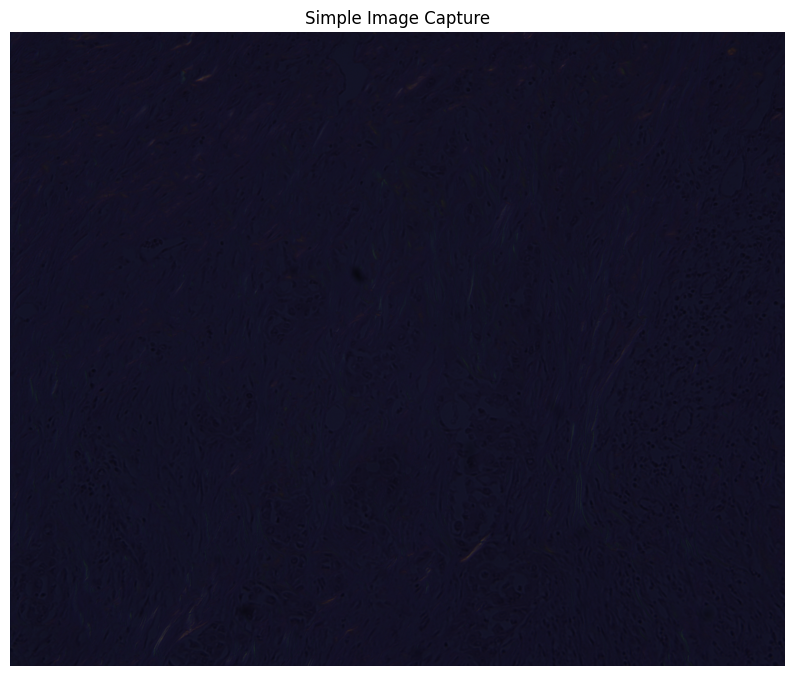

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title("Simple Image Capture")
plt.axis('off')
plt.show()

In [38]:
current = hardware.get_current_position()
current

sp_position(x=7953.0, y=4823.0, z=-71.1)

In [39]:
destination = current
destination.x = current.x+10
destination

sp_position(x=7963.0, y=4823.0, z=-71.1)

In [40]:
ppm_settings.stage

Stage(z_stage='ZStage', xlimit=Xlimit(low=-21000.0, high=33000.0), ylimit=Ylimit(low=-8000.0, high=11000.0), zlimit=Zlimit(low=-100, high=100), vendor='Prior')

In [41]:
hardware.move_to_position(destination)

In [42]:
hardware.get_current_position()

sp_position(x=7963.0, y=4823.0, z=-71.1)

In [7]:
brushless = "KBD101_Thor_Rotation"
core.get_position(brushless)

270.783

## tests

In [1]:
import smart_wsi_scanner as sws

In [2]:
from smart_wsi_scanner.smartpath import init_pycromanager
core, studio = init_pycromanager()

In [3]:
from smart_wsi_scanner.smartpath import init_pycromanager
core, studio = init_pycromanager()
if core.get_property("MicroPublisher6","Color")=="OFF":
    core.set_property("MicroPublisher6","Color","ON")
if core.get_property("MicroPublisher6","Color - Algorithm CFA") != "G-R-B-G":
    core.set_property("MicroPublisher6","Color - Algorithm CFA", "G-R-B-G")


In [5]:
brushless = "KBD101_Thor_Rotation"
core.get_position(brushless)

296

In [7]:

angle = -10
def ppm_to_thor(angle):
    return (-2*angle + 276)

newAngle = ppm_to_thor(angle)
core.set_position(brushless, newAngle)
core.get_position(brushless)

New angle calculated 296...


296

In [10]:
import smart_wsi_scanner.smartpath as sp
x,y = sp.snap(core)

Capture Failed: SP doesn't recognize : tags['Core-Camera']='MicroPublisher6'


## read Mike's color correction configs

In [27]:
import csv
from dataclasses import dataclass
from typing import List

@dataclass
class ColorPreset:
    name: str
    color: str
    color_algorithm_cfa: str
    color_blue_scale: float
    color_green_scale: float
    color_red_scale: float
    exposure: float
    objective_label: str
    
    def apply_to_camera(self, core, device="MicroPublisher6", objective_device="DObjective"):
            # Apply color and algorithm
            core.set_property(device, "Color", self.color)
            core.set_property(device, "Color - Algorithm CFA", self.color_algorithm_cfa)
            core.set_property(device, "Color - Blue scale", self.color_blue_scale)
            core.set_property(device, "Color - Green scale", self.color_green_scale)
            core.set_property(device, "Color - Red scale", self.color_red_scale)
            core.set_property(device, "Exposure", self.exposure)
            core.set_property(objective_device, "Label", self.objective_label)

def parse_all_presets(cfg_path: str) -> List[ColorPreset]:
    presets = []
    current_name = None
    current_values = {}
    with open(cfg_path, newline='') as csvfile:
        for line in csvfile:
            line = line.strip()
            if not line:
                continue
            # Detect preset header
            if line.startswith("#") or (line.startswith("[") and line.endswith("]")):
                # Save previous preset if exists
                if current_name and current_values:
                    try:
                        presets.append(ColorPreset(name=current_name, **current_values))
                    except Exception as e:
                        print(f"Skipping preset {current_name} due to error: {e}")
                # Start new preset
                current_name = line.strip("#[] ").strip()
                current_values = {}
                continue
            # Parse CSV line
            row = next(csv.reader([line]))
            if len(row) < 6:
                continue
            prop = row[4].lower().replace(" ", "_").replace("-", "_")
            value = row[5]
            # Map config property to dataclass field
            if prop == "color":
                current_values["color"] = value
            elif prop == "color___algorithm_cfa":
                current_values["color_algorithm_cfa"] = value
            elif prop == "color___blue_scale":
                current_values["color_blue_scale"] = float(value)
            elif prop == "color___green_scale":
                current_values["color_green_scale"] = float(value)
            elif prop == "color___red_scale":
                current_values["color_red_scale"] = float(value)
            elif prop == "exposure":
                current_values["exposure"] = float(value)
            elif prop == "label":
                current_values["objective_label"] = value
        # Save last preset
        if current_name and current_values:
            try:
                presets.append(ColorPreset(name=current_name, **current_values))
            except Exception as e:
                print(f"Skipping preset {current_name} due to error: {e}")
    return presets


In [28]:
# Usage
presets = parse_all_presets("../smart_wsi_scanner/configurations/config_PPM.cfg")
#for preset in presets:
#    print(preset)
presets

Skipping preset Preset: Startup due to error: ColorPreset.__init__() missing 5 required positional arguments: 'color_algorithm_cfa', 'color_blue_scale', 'color_green_scale', 'color_red_scale', and 'exposure'
Skipping preset Preset: 10x 0.3 due to error: ColorPreset.__init__() missing 6 required positional arguments: 'color', 'color_algorithm_cfa', 'color_blue_scale', 'color_green_scale', 'color_red_scale', and 'exposure'
Skipping preset Preset: 40x 0.5 red Pol due to error: ColorPreset.__init__() missing 6 required positional arguments: 'color', 'color_algorithm_cfa', 'color_blue_scale', 'color_green_scale', 'color_red_scale', and 'exposure'
Skipping preset Preset: 20x 0.5 due to error: ColorPreset.__init__() missing 6 required positional arguments: 'color', 'color_algorithm_cfa', 'color_blue_scale', 'color_green_scale', 'color_red_scale', and 'exposure'
Skipping preset Preset: 40x 0.75 due to error: ColorPreset.__init__() missing 6 required positional arguments: 'color', 'color_algori

[ColorPreset(name='Preset: ColorOn 10x 5deg', color='ON', color_algorithm_cfa='G-B-R-G', color_blue_scale=2.4344, color_green_scale=1.0, color_red_scale=1.1621, exposure=200.0, objective_label='10x 0.3'),
 ColorPreset(name='Preset: ColorOn 20x 0deg', color='ON', color_algorithm_cfa='G-B-R-G', color_blue_scale=2.2428, color_green_scale=1.014, color_red_scale=1.0, exposure=200.0, objective_label='20x 0.5'),
 ColorPreset(name='Preset: ColorOn 10x 0deg', color='ON', color_algorithm_cfa='G-R-B-G', color_blue_scale=1.0, color_green_scale=1.1691, color_red_scale=1.8056, exposure=500.0, objective_label='10x 0.3'),
 ColorPreset(name='Preset: ColorOn 40x 5deg', color='ON', color_algorithm_cfa='G-B-R-G', color_blue_scale=2.8488, color_green_scale=1.2352, color_red_scale=1.0, exposure=500.0, objective_label='40x 0.75'),
 ColorPreset(name='Preset: ColorOn 10x 50deg', color='ON', color_algorithm_cfa='G-B-R-G', color_blue_scale=3.7246, color_green_scale=1.0, color_red_scale=1.0712, exposure=4.0, obje

In [29]:
for kx,k in enumerate(presets):
    print(kx, k.name)

0 Preset: ColorOn 10x 5deg
1 Preset: ColorOn 20x 0deg
2 Preset: ColorOn 10x 0deg
3 Preset: ColorOn 40x 5deg
4 Preset: ColorOn 10x 50deg
5 Preset: ColorOn 40x 50deg
6 Preset: ColorOn 40x 0deg
7 Preset: ColorOn 20x 50deg
8 Preset: Raw
9 Preset: ColorOn 20x 5deg


In [31]:
presets[1].apply_to_camera(core)

In [ ]:
""

In [4]:
core.get_position()

-55.1

In [3]:
core.get_position("KBD101_Thor_Rotation")
stage_name = "KBD101_28253598"

Exception: java.lang.Exception: No device with label "KBD101_Thor_Rotation"
mmcorej.MMCoreJJNI.CMMCore_getPosition__SWIG_0(Native Method)
mmcorej.CMMCore.getPosition(CMMCore.java:1236)
sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
java.lang.reflect.Method.invoke(Method.java:498)
org.micromanager.pyjavaz.ZMQServer.runMethod(ZMQServer.java:431)
org.micromanager.pyjavaz.ZMQServer.parseAndExecuteCommand(ZMQServer.java:511)
org.micromanager.pyjavaz.ZMQServer.lambda$initialize$2(ZMQServer.java:121)
java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:511)
java.util.concurrent.FutureTask.run(FutureTask.java:266)
java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
java.lang.Thread.run(Thread.java:748)


In [ ]:
brushless = "KBD101_Thor_Rotation";
print("Homing " + brushless + "...");
mmc.home(brushless);
mmc.waitForDevice(brushless);
// One more time, in case it failed the first time.
mmc.home(brushless);
mmc.waitForDevice(brushless);
print("Motor homed at: " + mmc.getPosition(brushless));

In [12]:
import platform
import psutil

if platform.system() != "Windows":
    print(platform)

for proc in psutil.process_iter(['name']):
    try:
        if "ImageJ.exe" in proc.info['name'] or "Micro-Manager" in proc.info['name']:
            print("runing")
    except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
        pass


not running


In [21]:
for proc in psutil.process_iter(['name']):
    name = proc.info['name']
    if name.startswith('j'):print(name); break
    

javaw.exe


True